# Name: 이운규

#ID: 2016320145

Link to your assignment2 colab: https://colab.research.google.com/drive/1pfwURA7_x7pzVM_FaODLueFK5A3JApeW?usp=sharing

Link to your evaluation script: https://drive.google.com/file/d/1wXUyKollYD26wzZ4BA4kQ7CQCs6nK63_/view?usp=sharing

These links should be shared to the web without any permission

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/content/drive/')

dat_filename = '/content/drive/My Drive/뇌및머신러닝/trn_dat.npy'
lab_filename = '/content/drive/My Drive/뇌및머신러닝/trn_lbl.npy'

dat = np.load(dat_filename) #Should contain (2800,32,32,16) float32 numpy array
lbl = np.load(lab_filename) #Should contain (2800,) boolean numpy array
print(dat.shape)
print(lbl.shape)



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(2800, 32, 32, 16)
(2800,)


**1. Getting Data** 

mount to googld drive 

loading data and labels for training

False


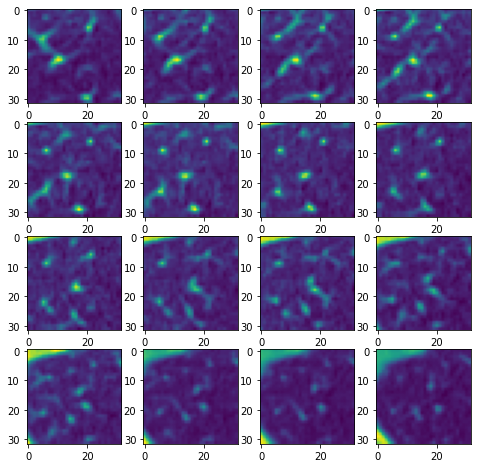

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 8))
for i in range(0,16):        
    plt.subplot(4, 4, i+1)
    plt.imshow(dat[2,:,:,i])
    plt.plot()

print(lbl[0])





**2. Data structure**

We must see how the data is stored in the npy file.

Therefore since the data has the format of (2800, 32, 32, 16) we can easily print out each of the array (32, 32, 16).

Each slide of (32, 32, 16) in constructed of 32 * 32 array form.

The slides make up the segments of the possible lung nodule area.




In [4]:
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# data= dat
# for i in range(0,2799):
#     for j in range(0,15):
#         dat[i,:,:,j] = scaler.fit_transform(dat[i,:,:,j])

# x1 = np.max(dat)
# y1 = np.min(dat)

# print(x1)
# print(y1)

x2 = np.max(dat)
y2 = np.min(dat)

print(x2)
print(y2)
print(dat.shape)
print(dat[0,:,:,0])
#print(data[0,:,:,0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dat,lbl,test_size=0.1,random_state=4)

print(X_train.shape)
X_train = tf.expand_dims(X_train, axis=4)
X_test = tf.expand_dims(X_test, axis=4)

print(X_train.shape)

print(y_train)



5230.0
-1543.0
(2800, 32, 32, 16)
[[-898. -931. -884. ... -711. -788. -696.]
 [-904. -909. -879. ... -659. -723. -696.]
 [-875. -821. -841. ... -504. -590. -705.]
 ...
 [-892. -875. -841. ... -861. -839. -787.]
 [-867. -877. -899. ... -838. -774. -751.]
 [-886. -863. -857. ... -806. -776. -807.]]
(2520, 32, 32, 16)
(2520, 32, 32, 16, 1)
[False  True  True ...  True False False]


**3. Data preprocessing** 

The data we have is 32 * 32 with 16 slides that make up one data input.

There are two ways to preprocess this data, we can use 2D CNN or 3D CNN,

First, for the 2D CNN the input should be 3D array, which would be (32, 32, 16)

Second, for the 3D CNN the input should be a 4D array, which would be (32, 32, 16, 1)

In my attempts to find the best model for the training, I decided to use the 3D CNN, therefore the data will be in shape (32, 32, 16, 1)

Also, most data fed to the CNN has a normalized form between 0 ~ 1. 

However in my attempts to normalize, it seemed the accuarcy was better when pure data was given. 

Therefore the input data will be sent in pure. 







In [5]:
import tensorflow as tf
from tensorflow import keras


# model = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[32,32,16]),
# keras.layers.Dense(10000,activation="relu"),
# keras.layers.Dense(1000,activation="relu"),
# keras.layers.Dense(300,activation="relu"),
# keras.layers.Dense(100,activation="relu"),
# keras.layers.Dense(10,activation="softmax"),
# ])

# model.summary()

# # weights, biases = hidden1.get_weights()
# # weights
# model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
#history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv3D, MaxPooling3D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# The first CNN stucture 
model = Sequential()

model.add(Conv3D(16, kernel_size = 2, activation='relu', input_shape=(32,32,16,1)))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.25))

model.add(Conv3D(32, kernel_size = 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.25))

model.add(Conv3D(64, kernel_size = 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(576, activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(Dense(144, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(36, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# The second CNN structure 

# model = Sequential()

# model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape=(32,32,16)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size = 3, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # model.add(Conv2D(128, kernel_size = 3, activation='relu'))
# # model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(2304, activation='relu',kernel_regularizer='l2'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu',kernel_regularizer='l2'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(8, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])

model.summary()

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 31, 31, 15, 16)    144       
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 15, 16)    64        
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 15, 15, 7, 16)     0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 7, 16)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 14, 14, 6, 32)     4128      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 6, 32)     128       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 7, 7, 3, 32)       0

**4. Model**

There are two ways that my model could be made, using the 2D CNN or the 3D CNN. 

Both have similar sturcture in essense, made up of 3 layer CNN and one flatten dense layer that is fully connected. 

1. First part of the CNN

    In the first three layers, we use a convolutional layer with kernel size: 3, for feature extraction of the image. The activation function is relu.

    Then we use Batch normalization to reduce overfitting. 

    After that, a pooling layer is added with the size: 2 to reduce the input size. 

    Lastely, a dropout layer is added for dropouts. 


2. Second part of the CNN

    A flattening layer is added with dense, that is fully connected. 

    The last part we use sigmoid as activation function because it is a binary classification and we only need to distinguish between 0, 1.


The model uses the binary cross entropy as loss function, because we only need to produce results that are 0, 1. 

Adam is used for optimizer.

We also added two callbacks, early stopping and learning rate reduction. 

This allows us to find the right amount of epochs for training. 
```



In [6]:

# print(X_train.shape)
# print(y_train.shape) 
# print(X_train[0,:,:,0])
# print(y_train[0])
epochs = 150
history = model.fit(X_train, y_train, batch_size = 16, epochs = epochs, validation_data=(X_test, y_test), callbacks = callbacks)

(2520, 32, 32, 16, 1)
(2520,)
tf.Tensor(
[[[-824.]
  [-820.]
  [-844.]
  ...
  [-831.]
  [-856.]
  [-888.]]

 [[-752.]
  [-739.]
  [-916.]
  ...
  [-831.]
  [-883.]
  [-846.]]

 [[-978.]
  [-768.]
  [-736.]
  ...
  [-882.]
  [-868.]
  [-843.]]

 ...

 [[-887.]
  [-844.]
  [-875.]
  ...
  [ -23.]
  [  94.]
  [ 120.]]

 [[-776.]
  [-818.]
  [-868.]
  ...
  [ 178.]
  [  27.]
  [  64.]]

 [[-919.]
  [-897.]
  [-658.]
  ...
  [   8.]
  [  62.]
  [ 109.]]], shape=(32, 32, 1), dtype=float32)
False
Epoch 1/150
158/158 [==============================] - 3s 21ms/step - loss: 3.6775 - accuracy: 0.6560 - val_loss: 2.4082 - val_accuracy: 0.5643
Epoch 2/150
158/158 [==============================] - 3s 19ms/step - loss: 2.4905 - accuracy: 0.6849 - val_loss: 2.5198 - val_accuracy: 0.6679
Epoch 3/150
158/158 [==============================] - 3s 19ms/step - loss: 2.2761 - accuracy: 0.7143 - val_loss: 1.9644 - val_accuracy: 0.8250
Epoch 4/150
158/158 [==============================] - 3s 19ms/step - lo

**5. Training model**

The training of the model reaches val_accuaracy of 0.95 at the end with epochs 146 which led to setting the epoch size around 150. 







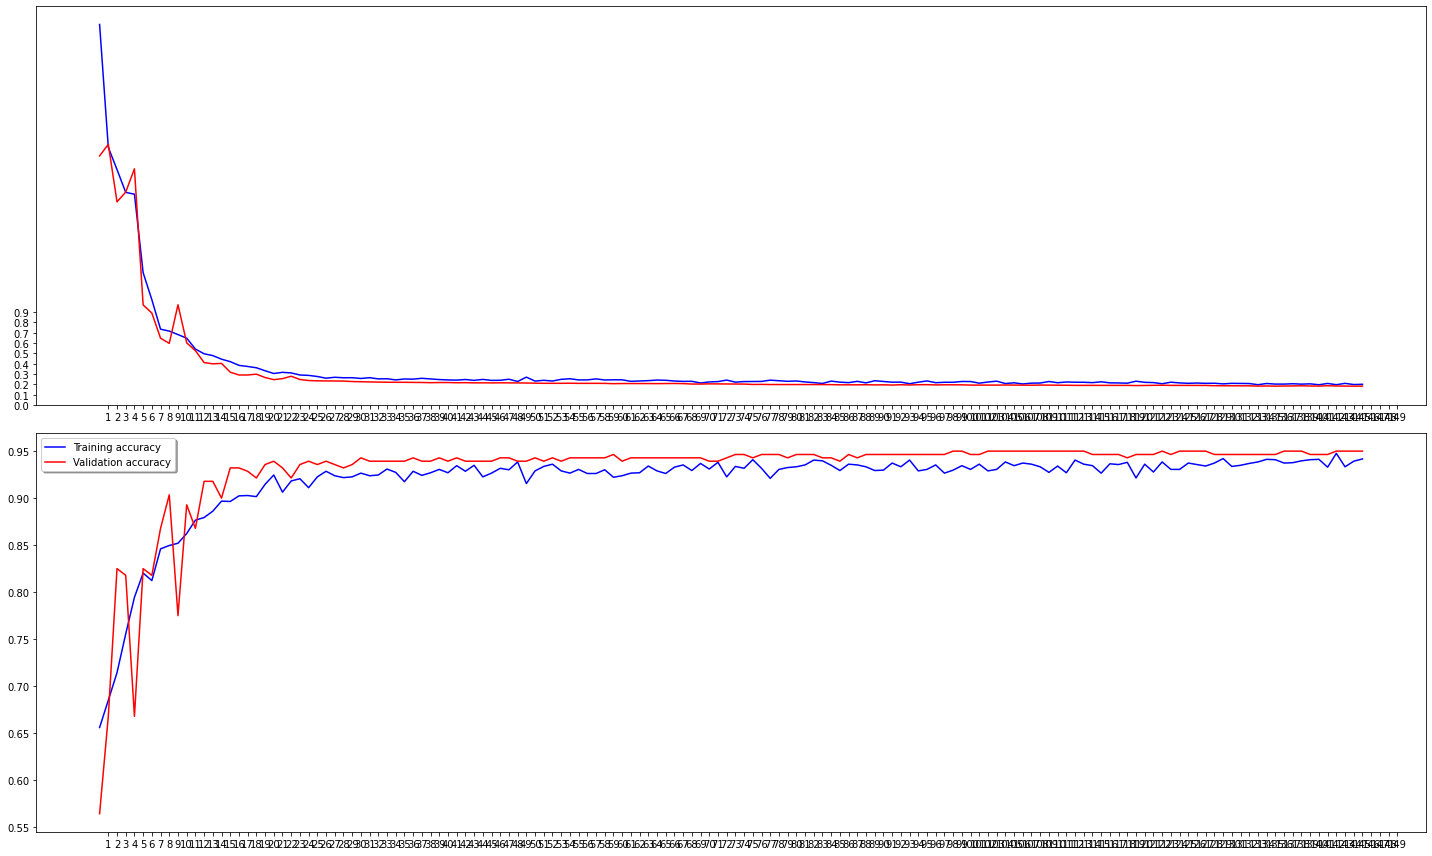

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1,epochs , 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

A simple graph of loss, and accuracy with the epochs to see how the training went. 
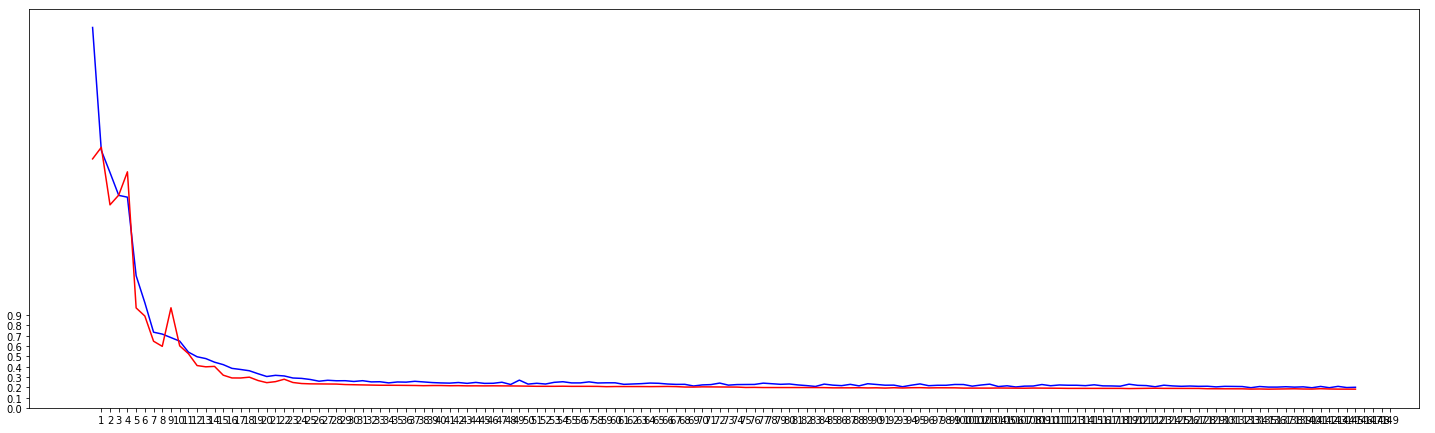

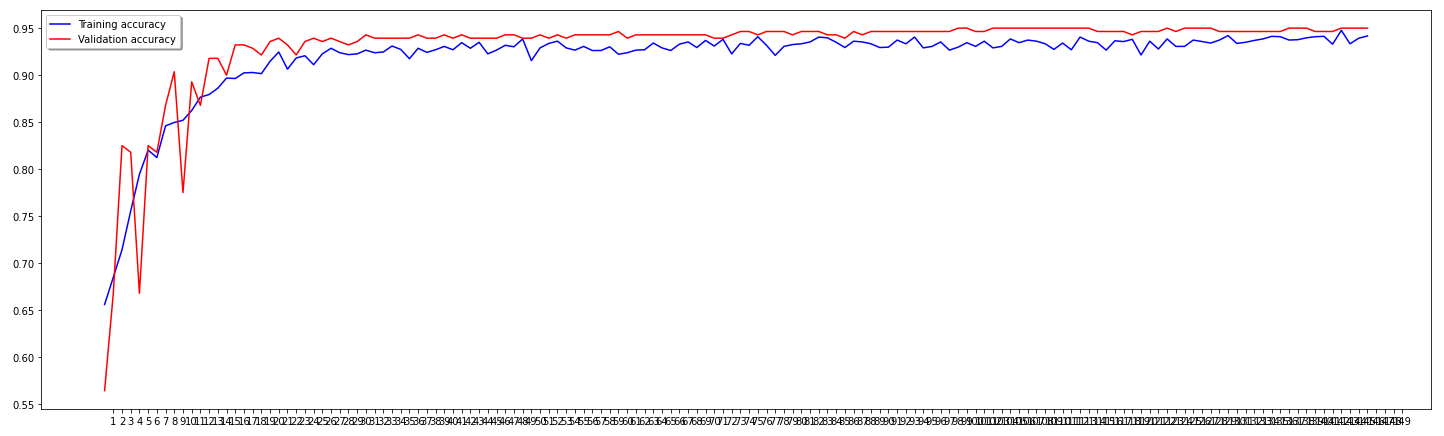

In [8]:
import torch
import pickle

#model.save_weights('nodule_detection.keras')
savepath = '/content/drive/My Drive/뇌및머신러닝/nodule_detection.h5'
model.save(savepath)

**6. Save model**

Saving the model to be used for evaluation.

**7. Conclusion**


This assignment gave me a deep insight on how the CNN works. It showed me the importance of preprocessing the data as much as making the model. Different optimizers and loss function were also a important part of this project. Mendling with these different function, showed me how each of them were different from each other. For example, I had used the softmax function for the loss function at first. Altough it is a good loss function and might have worked well in a multiclassification problem, after rigorous attempts, I figured binary cross entropy was better for this project. Also, increasing the validation set accuracy was another callenge. Including many different normalization techniques with the learning rate reduction, helped me to get the amount of accuracy needed. 

Further studies in other CNN models is now possible for me. As image processing is one area of interest this project helped me to understand CNN in a deeper level. 

